# ARTIFICIAL NEURAL NETWORKS (CSE422)

### Muhammed Çınaklı - 161805027 

## Traffic Signs Detection

### Project

We will build a deep neural network model that can classify traffic signs present in the image into different categories.

### Dataset

The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes. The dataset is quite varying, some of the classes have many images while some classes have few images.

Dataset link --> https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Let's start with checking GPU

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10536956782613213212,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12351783423858239466
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15369953153784858515
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3663790080
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16271663316494391871
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [3]:
tf.test.is_built_with_cuda()

True

### Labels Overview

In [4]:
import pandas as pd
pd.read_csv('labels.csv')

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Importing Libraries

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

### Data Collection

Assigning the path for train and test images

In [6]:
train_path = 'dataset/Train'
test_path = 'dataset/Test'

In [7]:
print(sorted(os.listdir(train_path)))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


### Visualization

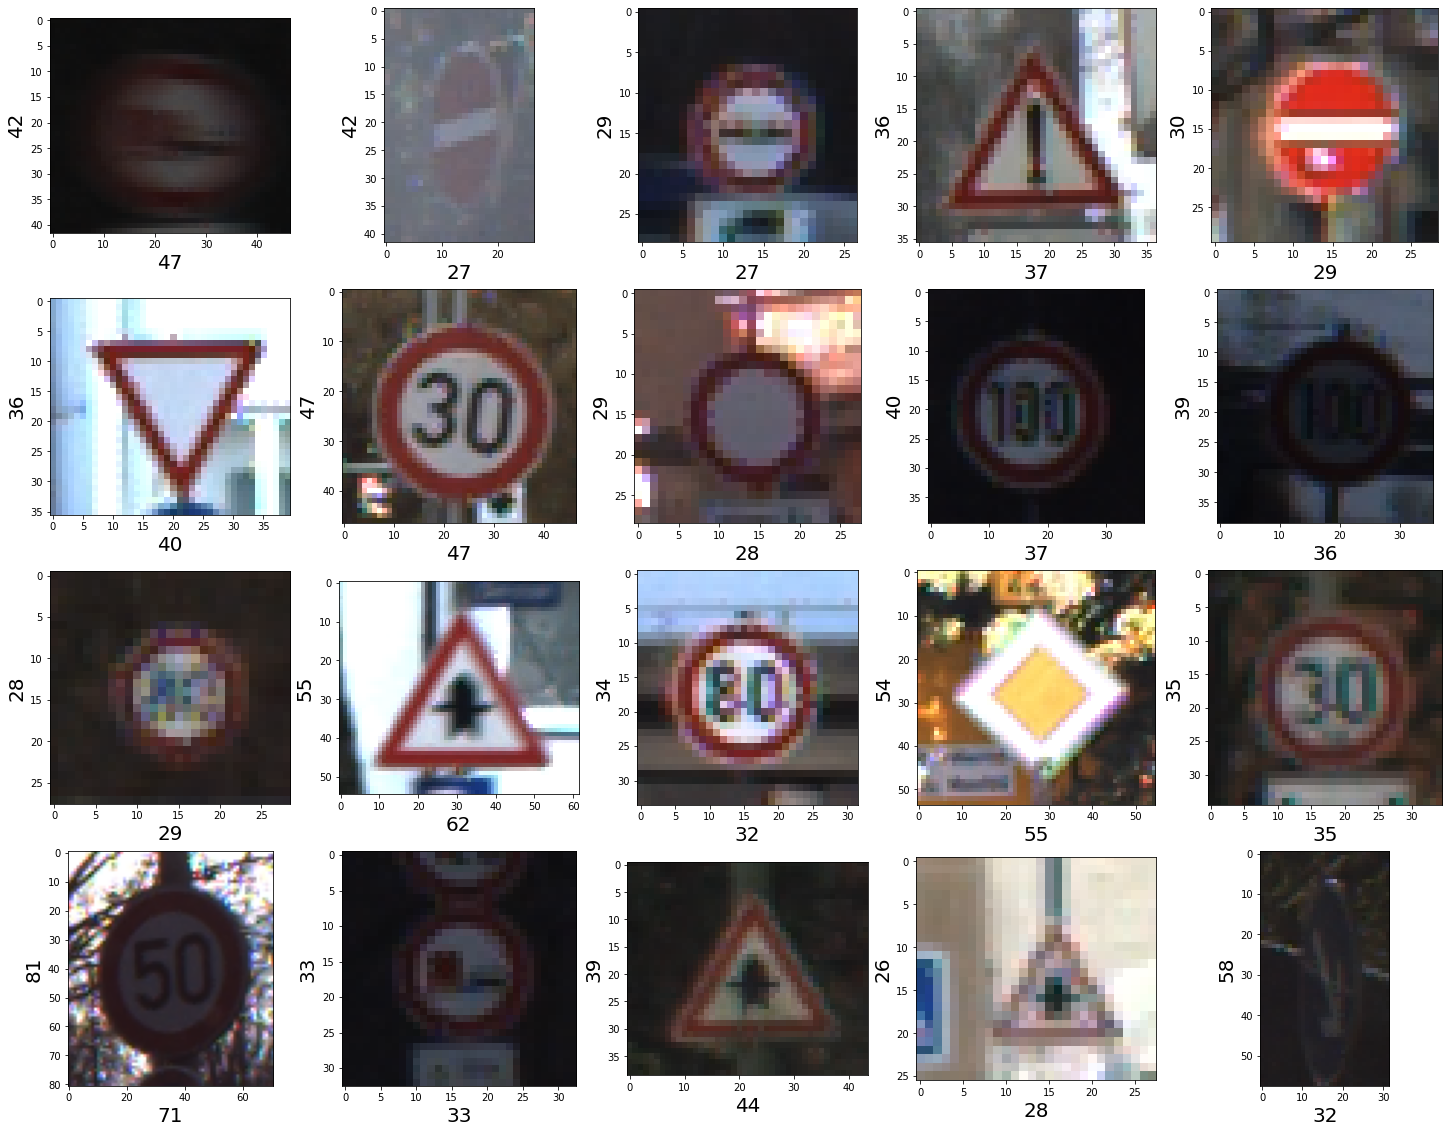

In [8]:
import random

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,21):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

The dimensions of the images are not fixed, first find the mean of the dimensions of all the images in training set.

In [9]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

Exploring the dimensions with a jointplot

/home/mami/anaconda3/envs/gpu_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


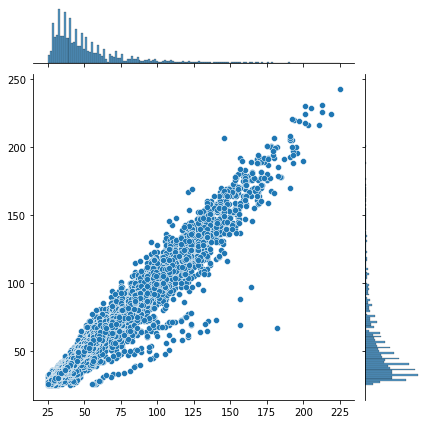

In [10]:
sns.jointplot(dim1,dim2)
plt.show()

In [11]:
np.mean(dim1)

50.328929582493814

In [12]:
np.mean(dim2)

50.83587951745773

Since the mean of both dimensions is around 50 , we will use (50x50) as the shape of images.

In [13]:
image_shape = (50,50)

### Data Preprocessing

Importing the images

In [14]:
from PIL import Image

images = []
label_id = []

for i in range(43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

Scaling the images so that the values remain between 0 and 1.Converting images into numpy array. The pixel value of each image ranges between 0 and 255. Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.

In [15]:
images = np.array(images)
images = images/255 

In [16]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [17]:
images.shape

(39209, 50, 50, 3)

/home/mami/anaconda3/envs/gpu_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


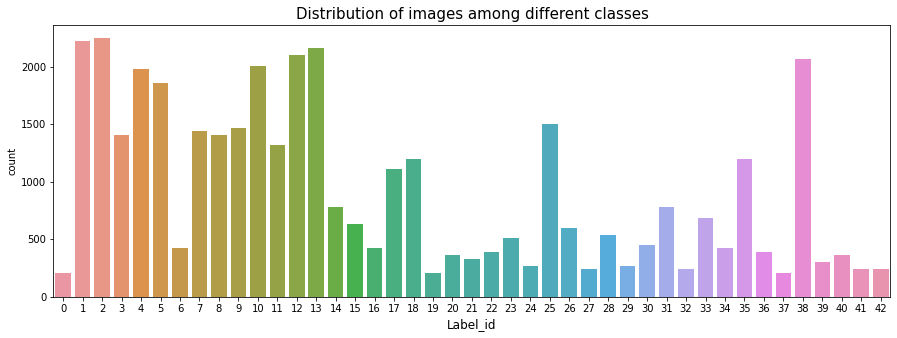

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

Saving the scaled images and labels for future use

In [19]:
np.save('Training_set', images)
np.save('Label_Id', label_id)

### Splitting the train data into train and validation data

In [20]:
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

Splitting the data

In [26]:
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 2021)

#### Encoding

In [27]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train,43)

y_val_cat = to_categorical(y_val,43)

## Model Building

We create a base model and step by step improve our model.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D ,BatchNormalization

In [29]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3277312   
_________________________________________________________________
dense_3 (Dense)              (None, 43)               

In [31]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [32]:
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25
491/491 [==============================] - 12s 25ms/step - loss: 0.6864 - accuracy: 0.8211 - val_loss: 0.1612 - val_accuracy: 0.9582
Epoch 2/25
491/491 [==============================] - 12s 24ms/step - loss: 0.0808 - accuracy: 0.9804 - val_loss: 0.0836 - val_accuracy: 0.9806
Epoch 3/25
491/491 [==============================] - 12s 24ms/step - loss: 0.0389 - accuracy: 0.9904 - val_loss: 0.0617 - val_accuracy: 0.9843
Epoch 4/25
491/491 [==============================] - 12s 24ms/step - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.1004 - val_accuracy: 0.9767
Epoch 5/25
491/491 [==============================] - 12s 24ms/step - loss: 0.0175 - accuracy: 0.9955 - val_loss: 0.0569 - val_accuracy: 0.9881
Epoch 6/25
491/491 [==============================] - 12s 24ms/step - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0432 - val_accuracy: 0.9926
Epoch 7/25
491/491 [==============================] - 12s 24ms/step - loss: 0.0128 - accuracy: 0.9966 - val_loss: 0.0594 - val_accuracy:

<AxesSubplot:>

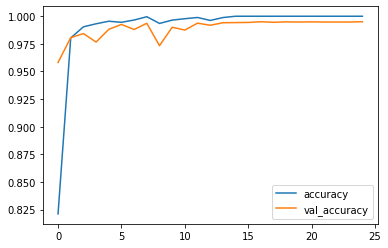

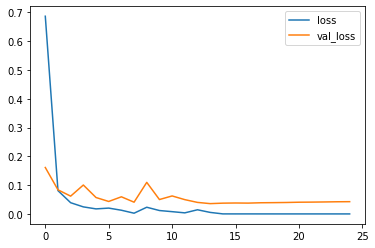

In [33]:
evaluation = pd.DataFrame(history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

As seen in the graph, although the results are good, we can further improve our model. so we will do normalization by adding Dropout and Batch Normalization to our model.

#### Dropout and BatchNormalization

In [34]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.3))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.3))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 21, 64)       

In [36]:
model2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [37]:
history2 = model2.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25
491/491 [==============================] - 15s 30ms/step - loss: 1.0717 - accuracy: 0.7146 - val_loss: 1.4007 - val_accuracy: 0.7714
Epoch 2/25
491/491 [==============================] - 14s 30ms/step - loss: 0.2739 - accuracy: 0.9174 - val_loss: 0.0885 - val_accuracy: 0.9741
Epoch 3/25
491/491 [==============================] - 14s 30ms/step - loss: 0.1926 - accuracy: 0.9456 - val_loss: 0.0854 - val_accuracy: 0.9787
Epoch 4/25
491/491 [==============================] - 15s 30ms/step - loss: 0.1824 - accuracy: 0.9506 - val_loss: 0.1273 - val_accuracy: 0.9790
Epoch 5/25
491/491 [==============================] - 15s 30ms/step - loss: 0.1368 - accuracy: 0.9619 - val_loss: 0.0798 - val_accuracy: 0.9816
Epoch 6/25
491/491 [==============================] - 15s 30ms/step - loss: 0.1077 - accuracy: 0.9719 - val_loss: 0.1356 - val_accuracy: 0.9792
Epoch 7/25
491/491 [==============================] - 15s 30ms/step - loss: 0.1114 - accuracy: 0.9708 - val_loss: 0.0421 - val_accuracy:

<AxesSubplot:>

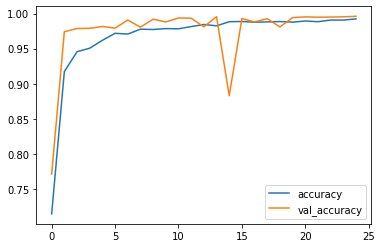

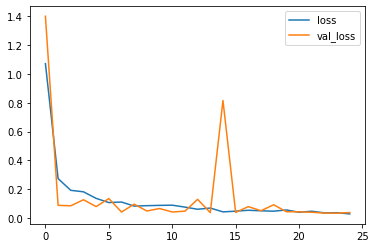

In [38]:
evaluation2 = pd.DataFrame(history2.history)

evaluation2[['accuracy', 'val_accuracy']].plot()
evaluation2[['loss', 'val_loss']].plot()

In [130]:
scores = model2.evaluate(x_val, y_val, verbose=1)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

246/246 [==============================] - 1s 6ms/step - loss: 0.0382 - accuracy: 0.9962
accuracy: 99.62%


As can be seen in the graph, the loss and accuracy values between 12-17 have increased and decreased suddenly. In order to prevent this, we will add the conv2d layer in our next model and observe the result.

In [41]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model3.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.3))
model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model3.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(rate=0.3))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(43, activation='softmax'))

In [42]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 46, 46, 32)        2432      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 42, 42, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 42, 42, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 18, 18, 128)      

In [43]:
model3.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [44]:
history3 = model3.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25
491/491 [==============================] - 30s 62ms/step - loss: 1.1555 - accuracy: 0.7272 - val_loss: 0.2428 - val_accuracy: 0.9360
Epoch 2/25
491/491 [==============================] - 29s 60ms/step - loss: 0.1829 - accuracy: 0.9453 - val_loss: 0.0495 - val_accuracy: 0.9857
Epoch 3/25
491/491 [==============================] - 30s 60ms/step - loss: 0.1252 - accuracy: 0.9632 - val_loss: 0.0680 - val_accuracy: 0.9823
Epoch 4/25
491/491 [==============================] - 30s 61ms/step - loss: 0.1032 - accuracy: 0.9715 - val_loss: 0.0657 - val_accuracy: 0.9850
Epoch 5/25
491/491 [==============================] - 30s 61ms/step - loss: 0.1017 - accuracy: 0.9739 - val_loss: 0.1432 - val_accuracy: 0.9754
Epoch 6/25
491/491 [==============================] - 30s 61ms/step - loss: 0.0902 - accuracy: 0.9778 - val_loss: 0.0309 - val_accuracy: 0.9930
Epoch 7/25
491/491 [==============================] - 30s 61ms/step - loss: 0.0782 - accuracy: 0.9808 - val_loss: 0.0576 - val_accuracy:

<AxesSubplot:>

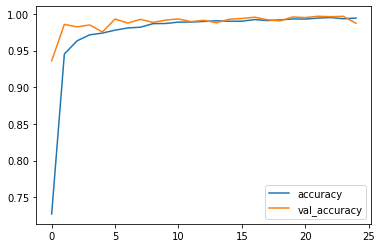

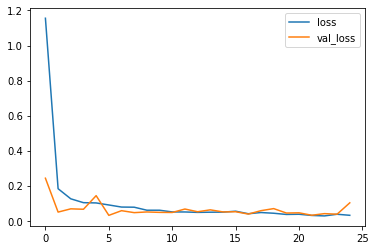

In [45]:
evaluation3 = pd.DataFrame(history3.history)

evaluation3[['accuracy', 'val_accuracy']].plot()
evaluation3[['loss', 'val_loss']].plot()

In [129]:
scores = model3.evaluate(x_val, y_val, verbose=1)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

246/246 [==============================] - 3s 11ms/step - loss: 0.1023 - accuracy: 0.9871
accuracy: 98.71%


As can be seen in the graph, the fluctuations are too much, I guess, the batch normalization process causes this.

In [82]:
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model4.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(rate=0.3))
model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model4.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(rate=0.3))
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(rate=0.5))
model4.add(Dense(43, activation='softmax'))

In [83]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 46, 46, 32)        2432      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 42, 42, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 18, 18, 128)       32896     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 9, 9, 128)        

In [84]:
model4.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [85]:
history4 = model4.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25
491/491 [==============================] - 29s 59ms/step - loss: 1.0134 - accuracy: 0.7210 - val_loss: 0.0978 - val_accuracy: 0.9758
Epoch 2/25
491/491 [==============================] - 28s 57ms/step - loss: 0.1398 - accuracy: 0.9597 - val_loss: 0.0450 - val_accuracy: 0.9893
Epoch 3/25
491/491 [==============================] - 28s 57ms/step - loss: 0.0812 - accuracy: 0.9761 - val_loss: 0.0368 - val_accuracy: 0.9925
Epoch 4/25
491/491 [==============================] - 29s 59ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0289 - val_accuracy: 0.9934
Epoch 5/25
491/491 [==============================] - 28s 58ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0220 - val_accuracy: 0.9949
Epoch 6/25
491/491 [==============================] - 29s 58ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0315 - val_accuracy: 0.9917
Epoch 7/25
491/491 [==============================] - 29s 58ms/step - loss: 0.0368 - accuracy: 0.9891 - val_loss: 0.0278 - val_accuracy:

<AxesSubplot:>

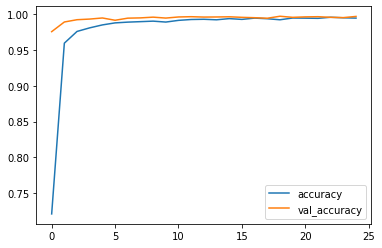

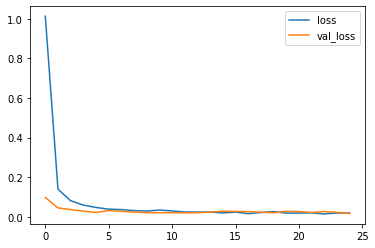

In [86]:
evaluation4 = pd.DataFrame(history4.history)

evaluation4[['accuracy', 'val_accuracy']].plot()
evaluation4[['loss', 'val_loss']].plot()

In [128]:
scores = model4.evaluate(x_val, y_val, verbose=1)
print("%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

246/246 [==============================] - 3s 13ms/step - loss: 0.0173 - accuracy: 0.9971
accuracy: 99.71%


In [88]:
model4.save('Model_best.h5')
model4.save('Model_best')

We can see from the graph that there is no need for batch normalization.

### Hyper Parameters Tune Processes With Keras Tuner

We use the kerastuner for the get best result.

In [117]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [132]:
from tensorflow.python.keras.layers import Activation,MaxPool2D
from keras.optimizers import Adam
def build_model(hp):
    model5 = Sequential()
    model5.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=64, max_value=128, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
                  activation='relu',
                  padding='same',
                  kernel_initializer='he_normal',
                  input_shape=x_train.shape[1:]))
    model5.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=32),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
                  activation='relu',
                  padding='same'))
    model5.add(MaxPool2D((2, 2)))
    model5.add(Dropout(hp.Choice('Dropout_1', values=[0.20,0.25,0.30])))
    model5.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=64, max_value=128, step=32), 
                  kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
                  padding='same', 
                  activation='relu'))
    model5.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=64, max_value=128, step=32), 
                  kernel_size=hp.Choice('conv_4_kernel', values = [3,5]),
                  padding='same', 
                  activation='relu'))
    model5.add(MaxPool2D(pool_size=(2, 2)))
    model5.add(Dropout(hp.Choice('Dropout_2', values=[0.20,0.25,0.30])))
    model5.add(Flatten())
    model5.add(Dense(units=hp.Int('dense_1_units', min_value=64, max_value=512, step=64), activation='relu'))
    model5.add(Dropout(hp.Choice('Dropout_3', values=[0.20,0.25,0.30,0.40])))
    model5.add(Dense(43, activation='softmax'))

    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model5.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model5

### Adam Configuration Parameters
Alpha : learning rate or step size. The proportion that weights are updated (e.g. 0.001) Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training beta1. The exponential decay rate for the first moment estimates (e.g. 0.9). beta2. The exponential decay rate for the second-moment estimates (e.g. 0.999). This value should be set close to 1.0 on problems with a sparse gradient (e.g. NLP and computer vision problems). epsilon. Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).



In [133]:
from tensorflow.keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint("best_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True)

In [134]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=25,
                          directory='output',
                          project_name="trafic_sign")

In [135]:
tuner_search.search(x_train,y_train,epochs=20,validation_data=(x_val, y_val),batch_size=64,callbacks=[check_point])
model5=tuner_search.get_best_models(num_models=1)[0]
model5.summary()

Trial 25 Complete [00h 30m 34s]
val_accuracy: 0.9961744546890259

Best val_accuracy So Far: 0.9980872273445129
Total elapsed time: 12h 11m 57s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 96)        2688      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 96)        83040     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 96)        230496    
_________________________________________________________________
conv2d_

In [136]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model5.compile(loss='sparse_categorical_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

In [137]:
history5 = model5.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(x_val, y_val))

Epoch 1/25
491/491 [==============================] - 77s 157ms/step - loss: 0.0229 - accuracy: 0.9939 - val_loss: 0.0306 - val_accuracy: 0.9963
Epoch 2/25
491/491 [==============================] - 74s 151ms/step - loss: 0.0282 - accuracy: 0.9923 - val_loss: 0.0206 - val_accuracy: 0.9958
Epoch 3/25
491/491 [==============================] - 73s 149ms/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 0.0214 - val_accuracy: 0.9973
Epoch 4/25
491/491 [==============================] - 73s 149ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0234 - val_accuracy: 0.9976
Epoch 5/25
491/491 [==============================] - 73s 149ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0221 - val_accuracy: 0.9976
Epoch 6/25
491/491 [==============================] - 73s 150ms/step - loss: 0.0180 - accuracy: 0.9950 - val_loss: 0.0271 - val_accuracy: 0.9963
Epoch 7/25
491/491 [==============================] - 74s 152ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.0307 - val_ac

<AxesSubplot:>

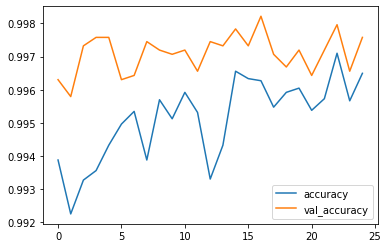

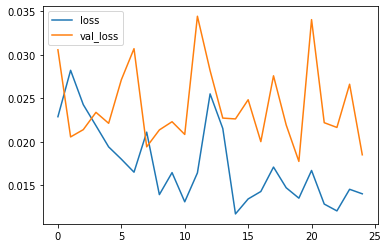

In [138]:
evaluation5 = pd.DataFrame(history5.history)

evaluation5[['accuracy', 'val_accuracy']].plot()
evaluation5[['loss', 'val_loss']].plot()

In [139]:
scores = model5.evaluate(x_val, y_val, verbose=1)
print("%s: %.2f%%" % (model5.metrics_names[1], scores[1]*100))

246/246 [==============================] - 8s 31ms/step - loss: 0.0185 - accuracy: 0.9976
accuracy: 99.76%


In [140]:
model5.save('Model_best_5.h5')
model5.save('Model_best_5')

INFO:tensorflow:Assets written to: Model_best_5/assets


## Testing on test data

In [141]:
from tensorflow.keras.models import load_model
model = load_model('Model_best_5')

In [142]:
test_path = 'dataset/Test'
test_img = sorted(os.listdir(test_path))

Defining a function that will scale images

In [143]:
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [144]:
test_images = scaling(test_img,test_path)

#### Test labels

In [145]:
test = pd.read_csv('dataset/Test.csv')

y_test = test['ClassId'].values

y_test

array([16,  1, 38, ...,  6,  7, 10])

### Testing on test images

In [146]:
y_pred = model.predict_classes(test_images)

y_pred

array([16,  1, 38, ...,  6,  7, 10])

In [147]:
def getCalssName(classNo):
    labels=pd.read_csv("labels.csv",encoding='ISO-8859-1')
    a=str(labels[labels["ClassId"]==classNo]["Name"])
    return a.replace("Name: Name, dtype: object","").replace("\n","")

'17    No entry'

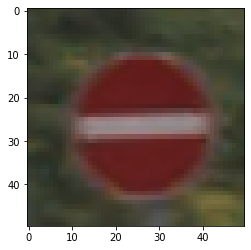

In [148]:
plt.imshow(test_images[31].reshape(50, 50, 3))
class_num = str(model.predict_classes(test_images[31].reshape(1, 50, 50, 3)))
class_num = class_num.replace("[", "").replace("]", "")
getCalssName(int(class_num))

'33    Turn right ahead'

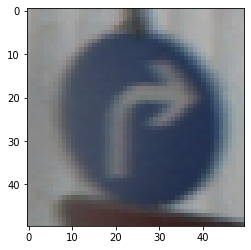

In [149]:
plt.imshow(test_images[81].reshape(50, 50, 3))
class_num = str(model.predict_classes(test_images[81].reshape(1, 50, 50, 3)))
class_num = class_num.replace("[", "").replace("]", "")
getCalssName(int(class_num))

'13    Yield'

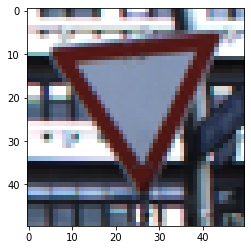

In [150]:
plt.imshow(test_images[51].reshape(50, 50, 3))
class_num = str(model.predict_classes(test_images[51].reshape(1, 50, 50, 3)))
class_num = class_num.replace("[", "").replace("]", "")
getCalssName(int(class_num))

In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      1.00      0.99       720
           2       1.00      0.99      0.99       750
           3       0.97      0.95      0.96       450
           4       1.00      0.99      0.99       660
           5       0.95      1.00      0.97       630
           6       0.99      0.95      0.97       150
           7       1.00      0.99      0.99       450
           8       0.99      0.98      0.98       450
           9       0.99      1.00      0.99       480
          10       1.00      1.00      1.00       660
          11       0.95      1.00      0.97       420
          12       1.00      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      0.99      1.00       150
          17       1.00    

## Testing With Real Image

In [152]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
model = load_model('Model_best_5')

'13    Yield'

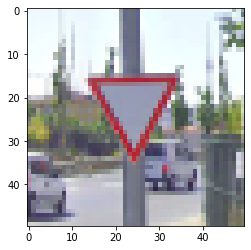

In [154]:
def test_real(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (50,50))
    img = np.array(img)
    img = img.astype('float32')/255 
    plt.imshow(img)
    class_num = str(model.predict_classes(img.reshape(1, 50, 50, 3)))
    class_num = class_num.replace("[", "").replace("]", "")
    
    return getCalssName(int(class_num))
    
img_path = 'real_test_img/3.png'
test_real(img_path)

'2    Speed limit (50km/h)'

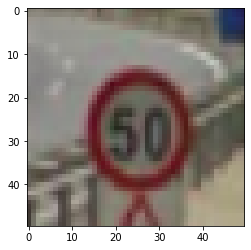

In [155]:
img_path = 'real_test_img/9.png'
test_real(img_path)

'38    Keep right'

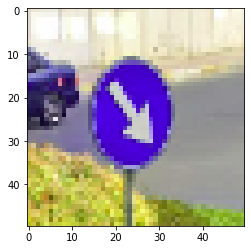

In [156]:
img_path = 'real_test_img/14.png'
test_real(img_path)

'17    No entry'

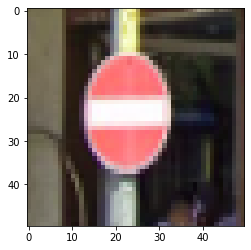

In [157]:
img_path = 'real_test_img/15.png'
test_real(img_path)

'18    General caution'

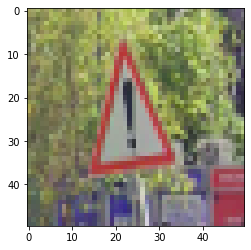

In [158]:
img_path = 'real_test_img/16.png'
test_real(img_path)

'12    Priority road'

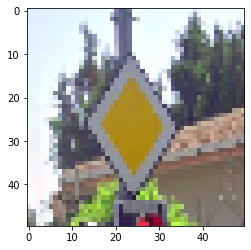

In [159]:
img_path = 'real_test_img/17.png'
test_real(img_path)

'1    Speed limit (30km/h)'

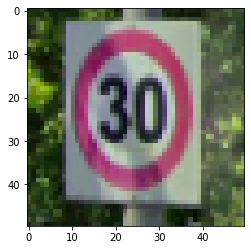

In [160]:
img_path = 'real_test_img/18.png'
test_real(img_path)

'24    Road narrows on the right'

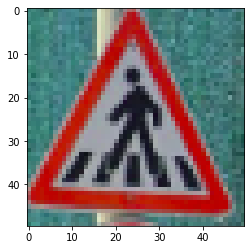

In [161]:
img_path = 'real_test_img/19.png'
test_real(img_path)

'35    Ahead only'

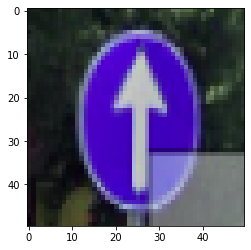

In [162]:
img_path = 'real_test_img/20.png'
test_real(img_path)

'5    Speed limit (80km/h)'

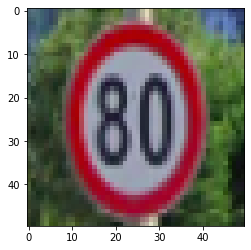

In [163]:
img_path = 'real_test_img/21.png'
test_real(img_path)

'4    Speed limit (70km/h)'

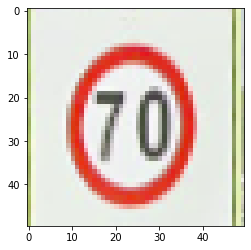

In [164]:
img_path = 'real_test_img/22.png'
test_real(img_path)

'37    Go straight or left'

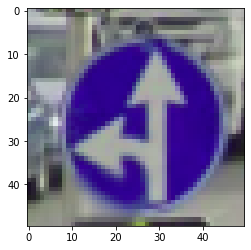

In [166]:
img_path = 'real_test_img/23.png'
test_real(img_path)

'28    Children crossing'

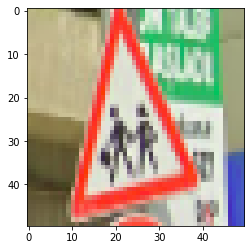

In [167]:
img_path = 'real_test_img/24.png'
test_real(img_path)

'0    Speed limit (20km/h)'

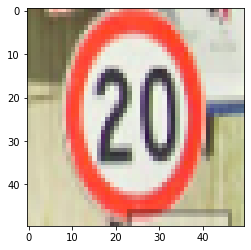

In [168]:
img_path = 'real_test_img/25.png'
test_real(img_path)

'11    Right-of-way at the next intersection'

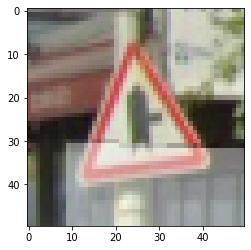

In [169]:
img_path = 'real_test_img/26.png'
test_real(img_path)